In [105]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [106]:
# Generando datos de ejemplo
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(
    n_samples = n_pts,
    random_state = 123,
    centers = centers,
    cluster_std = 0.4
)

In [107]:
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))

In [108]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])

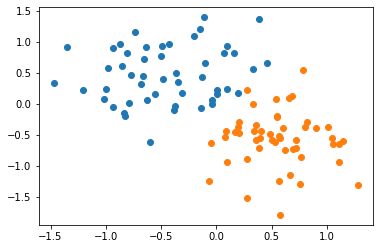

In [109]:
scatter_plot()

In [110]:
class Model(nn.Module):
    def __init__(self,input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [111]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [112]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]

In [113]:
def get_params():
    return (w1.item(), w2.item(), b1.item())

In [114]:
def plot_fit(title):
    w1, w2, b1 = get_params()
    x1 = np.array([-2.0, 2.0])
    plt.title = title
    x2 = (w1*x1 + b1)/-w2
    plt.plot(x1, x2, "r")
    scatter_plot()

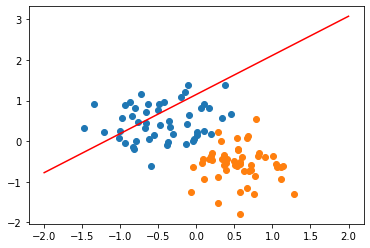

In [115]:
plot_fit("Initial Model")

In [116]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [117]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch:", i, "loss", loss.item())
    
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss 0.6185115575790405
epoch: 1 loss 0.6081147193908691
epoch: 2 loss 0.5980583429336548
epoch: 3 loss 0.5883299112319946
epoch: 4 loss 0.5789171457290649
epoch: 5 loss 0.5698080658912659
epoch: 6 loss 0.5609909892082214
epoch: 7 loss 0.5524548888206482
epoch: 8 loss 0.544188916683197
epoch: 9 loss 0.5361824631690979
epoch: 10 loss 0.5284258127212524
epoch: 11 loss 0.5209088325500488
epoch: 12 loss 0.5136225819587708
epoch: 13 loss 0.5065579414367676
epoch: 14 loss 0.4997061789035797
epoch: 15 loss 0.4930592477321625
epoch: 16 loss 0.4866090416908264
epoch: 17 loss 0.48034802079200745
epoch: 18 loss 0.4742688834667206
epoch: 19 loss 0.4683646261692047
epoch: 20 loss 0.4626286029815674
epoch: 21 loss 0.4570542573928833
epoch: 22 loss 0.45163559913635254
epoch: 23 loss 0.44636666774749756
epoch: 24 loss 0.4412417709827423
epoch: 25 loss 0.43625572323799133
epoch: 26 loss 0.43140313029289246
epoch: 27 loss 0.42667922377586365
epoch: 28 loss 0.4220792353153229
epoch: 29 loss 0.41

epoch: 319 loss 0.14670506119728088
epoch: 320 loss 0.14648541808128357
epoch: 321 loss 0.1462668478488922
epoch: 322 loss 0.14604927599430084
epoch: 323 loss 0.14583270251750946
epoch: 324 loss 0.14561717212200165
epoch: 325 loss 0.14540261030197144
epoch: 326 loss 0.1451890766620636
epoch: 327 loss 0.14497651159763336
epoch: 328 loss 0.1447649449110031
epoch: 329 loss 0.14455431699752808
epoch: 330 loss 0.14434467256069183
epoch: 331 loss 0.144135981798172
epoch: 332 loss 0.14392824470996857
epoch: 333 loss 0.14372141659259796
epoch: 334 loss 0.14351555705070496
epoch: 335 loss 0.14331063628196716
epoch: 336 loss 0.143106609582901
epoch: 337 loss 0.14290350675582886
epoch: 338 loss 0.14270131289958954
epoch: 339 loss 0.14250002801418304
epoch: 340 loss 0.14229963719844818
epoch: 341 loss 0.14210012555122375
epoch: 342 loss 0.14190147817134857
epoch: 343 loss 0.1417037397623062
epoch: 344 loss 0.1415068507194519
epoch: 345 loss 0.14131081104278564
epoch: 346 loss 0.14111565053462982
e

epoch: 600 loss 0.10876205563545227
epoch: 601 loss 0.10867719352245331
epoch: 602 loss 0.10859254002571106
epoch: 603 loss 0.10850808769464493
epoch: 604 loss 0.10842385143041611
epoch: 605 loss 0.108339823782444
epoch: 606 loss 0.10825598984956741
epoch: 607 loss 0.10817237943410873
epoch: 608 loss 0.10808897018432617
epoch: 609 loss 0.10800576210021973
epoch: 610 loss 0.10792276263237
epoch: 611 loss 0.10783996433019638
epoch: 612 loss 0.10775736719369888
epoch: 613 loss 0.1076749786734581
epoch: 614 loss 0.10759279876947403
epoch: 615 loss 0.10751079767942429
epoch: 616 loss 0.10742900520563126
epoch: 617 loss 0.10734742134809494
epoch: 618 loss 0.10726603865623474
epoch: 619 loss 0.10718482732772827
epoch: 620 loss 0.10710383206605911
epoch: 621 loss 0.10702303051948547
epoch: 622 loss 0.10694242268800735
epoch: 623 loss 0.10686199367046356
epoch: 624 loss 0.10678176581859589
epoch: 625 loss 0.10670173913240433
epoch: 626 loss 0.1066218912601471
epoch: 627 loss 0.10654225200414658

epoch: 908 loss 0.08965492993593216
epoch: 909 loss 0.08960912376642227
epoch: 910 loss 0.08956339955329895
epoch: 911 loss 0.089517742395401
epoch: 912 loss 0.08947215974330902
epoch: 913 loss 0.08942665159702301
epoch: 914 loss 0.08938122540712357
epoch: 915 loss 0.0893358588218689
epoch: 916 loss 0.0892905592918396
epoch: 917 loss 0.08924535661935806
epoch: 918 loss 0.0892002135515213
epoch: 919 loss 0.08915513753890991
epoch: 920 loss 0.08911013603210449
epoch: 921 loss 0.08906520903110504
epoch: 922 loss 0.08902036398649216
epoch: 923 loss 0.08897557854652405
epoch: 924 loss 0.0889308825135231
epoch: 925 loss 0.08888623118400574
epoch: 926 loss 0.08884166926145554
epoch: 927 loss 0.0887971818447113
epoch: 928 loss 0.08875274658203125
epoch: 929 loss 0.08870840072631836
epoch: 930 loss 0.08866411447525024
epoch: 931 loss 0.0886198878288269
epoch: 932 loss 0.08857575058937073
epoch: 933 loss 0.08853168785572052
epoch: 934 loss 0.08848768472671509
epoch: 935 loss 0.08844373375177383


Text(0.5, 0, 'epoch')

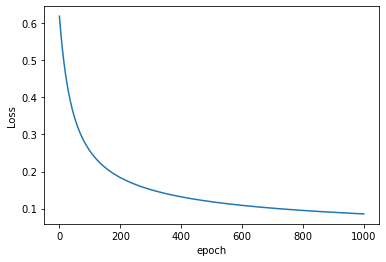

In [118]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

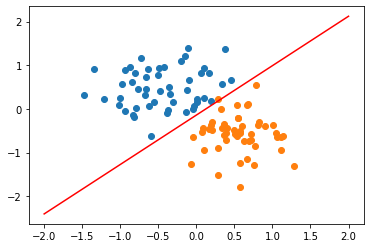

In [119]:
plot_fit("Trained Model")

Red point positive probability = 0.999265730381012
Black point positive probability = 0.0002657687000464648
Red point in class 1
Black point in class 0


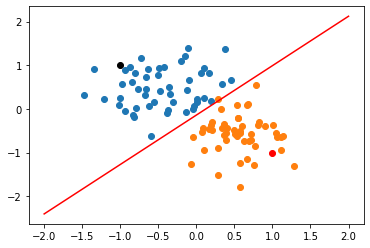

In [120]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], "ro")
plt.plot(point2.numpy()[0], point2.numpy()[1], "ko")
print("Red point positive probability = {}".format(model.forward(point1).item()))
print("Black point positive probability = {}".format(model.forward(point2).item()))
print("Red point in class {}".format(model.predict(point1)))
print("Black point in class {}".format(model.predict(point2)))
plot_fit("Trained model")